Sprint 4: **Creation of Initial Models**

**Objective**: To test different machine learning models and compare their results.

**Tasks**:

1.  **Linear Regression Model**
    * Train and test a linear regression model for a baseline comparison.
2.  **Random Forest for Energy Yield Prediction**
    * Experiment with a Random Forest regression model to evaluate non-linear patterns.
3.  **Gradient Boosting Model**
    * Experiment with XGBoost or LightGBM to evaluate time-based patterns.
4.  **Model Result Visualization**
    * Create comparative graphs and tables on model accuracy.
5.  **Model Combination**
    * Create a model that combines the results of different methods to achieve the best prediction.

## What is going on?

During the SPRINT-4, we are supposed to try different models for prediction `Power_Output` variable.



### The following code:

- Fetches the processed CSV data (Code Duplication ISSUE!!!)
- Instatiates my service
- Reads the df to the console

In [32]:
from tomodachi_core.models.weather_impact_model.tomodachi_model import TomodachiModel
from tomodachi_core.tomodachi.services import PandasService
from config_loader import load_config
import os
import pathlib
import pandas as pd

# get curr dir
current_dir = os.getcwd()

# find the root using patlihb
root_dir = pathlib.Path(current_dir).parents[0].resolve()

# path to the config
config_path = (root_dir / "tomodachi_core" / "config_development" / "config.py").resolve()

# load the config
config = load_config(config_path)

# Grab the CSV_PATH
CSV_PATH = config.SAVE_TO_PATH

# Finally, we have to combine the path
CSV_PATH = (root_dir / CSV_PATH).resolve()

# Create PandasService
pandas_service = PandasService(str(CSV_PATH))

# load the data
df = pandas_service.load_csv_data()

Path C:\Users\Lenovo\Desktop\python_app\tuuleenergia_tomodachi exists.


## For preprocessing, please refer to the SPRINT-1. 

The task was to try different models and see how they predict:

- Based on SPRINT-3, we can make_test_split
- fit models (individually because VotingRegressor will NOT let us compare them separately)

### Results were:

#### LinearModel:
  
  - R2: 0.9287
  - RMSE: 116.3992

#### GradientBoostingRegressor:
  
  - R2: 0.9350
  - RMSE: 111.1626

#### RandomForestRegressor:
  
  - R2: 0.9889
  - RMSE: 6.7711

#### XGBoost:
  
  - R2: 0.9236
  - RMSE: 120.1013

#### Voting Regressor:

  - R2: 9637
  - RMSE: 9.1167

In [2]:
# Let us create the model
# Define X, y
X = df.drop(columns=["Power_Output", "Precipitation_Unit", "Timestamp"])
y = df["Power_Output"]

# instantiate the model & fit
tomodachi_model = TomodachiModel(X, y)
tomodachi_model.fit_models()

LinearModel: 
Training R2 score: 0.9287
Training RMSE: 116.3992
GradientBoostingRegressor fit complete!
Training R2 score: 0.9350
Training RMSE: 111.1626
RandomForestRegressor fit complete!
Training R2 score: 0.9889
Training RMSE: 6.7711
XGBoost training: 
R2 score: 0.9236
RMSE: 120.1013
VotingRegressor R²: 0.9637
VotingRegressor RMSE: 9.1167


In [3]:
# For the example let us check out predictions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
X_train

,Wind_Speed,Wind_Gust,Wind_Direction,Temperature,Humidity,Precipitation,Pressure,Cloud_Cover,Solar_Radiation,Hour_of_Day,Day_of_Week,Month,Wind_Speed_Squared,Wind_Speed_Cubed
21177,16.949414,18.445253,346,6.604642,44.842399,2.930774,1001.464090,78.193444,609.948642,9,2,6,287.282642,4869.272506
23942,1.179233,2.203293,65,1.874356,74.541738,1.971483,1035.407104,46.916544,731.934974,14,5,9,1.390592,1.639832
1247,4.769570,8.232425,161,-6.601697,65.955429,2.183646,1041.518146,23.704064,704.885449,23,4,2,22.748796,108.501970
23622,4.040059,4.715095,75,6.604642,73.494270,4.124119,1002.896066,42.229178,645.030675,6,6,9,16.322078,65.942159
28454,14.733282,18.270463,315,14.746132,51.424170,7.048081,987.673336,87.919382,907.274986,14,4,3,217.069594,3198.147508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,16.176813,17.076280,289,0.286690,66.218343,8.864477,1035.447821,4.442467,201.238220,18,4,5,261.689277,4233.298475
5390,16.065188,18.434538,238,11.604409,43.670897,6.605479,1039.129489,58.774546,547.121924,14,2,8,258.090273,4146.268819
860,20.973104,21.016597,246,6.604642,63.263194,3.841240,1001.501373,63.880787,835.600453,20,2,2,439.871076,9225.461663
15795,11.006861,14.151259,315,8.907701,73.137309,8.531418,1016.367604,76.493542,45.836357,3,2,10,121.150983,1333.491998


In [5]:
print("Prediction for the testing (XGBoost): ", tomodachi_model.xgboost_model.predict(X_test))

Prediction successful!
Prediction for the testing (XGBoost):  Ok([429.0294    75.867805 747.06866  ... -34.574673 380.68564   32.49747 ])


In [6]:
print("Prediction for the testing (Forest): ", tomodachi_model.forest_model.predict(X_test))

Prediction for the testing (Forest):  [457.78789898  77.98553824 826.27894706 ... -45.97613109 377.24007877
  38.29502279]


In [7]:
print("Prediction for the testing (Linear): ", tomodachi_model.linear_model.predict(X_test))

Prediction for the testing (Linear):  Ok([436.02995298  81.25286608 754.87038147 ...  18.07294979 369.19143034
  17.03345875])


In [8]:
print("Prediction for the testing (XGBoost): ", tomodachi_model.gradient_model.predict(X_test))

Prediction for the testing (XGBoost):  [430.10223257  80.13879675 736.73029713 ...  13.52768079 372.27719392
  17.60982755]


In [9]:
# Check out if it predicts on the unknown (untrained data)
import numpy as np

unknown_X = np.array([[
    3.5,        # Wind_Speed
    5.2,        # Wind_Gust
    310,        # Wind_Direction
    15.0,       # Temperature
    45.0,       # Humidity
    0.0,        # Precipitation
    1012.3,     # Pressure
    60.0,       # Cloud_Cover
    500.0,      # Solar_Radiation
    14,         # Hour_of_Day
    3,          # Day_of_Week
    5,          # Month
    3.5**2,     # Wind_Speed_Squared
    3.5**3      # Wind_Speed_Cubed
]])


print("Prediction for unknown_X:", tomodachi_model.xgboost_model.predict(unknown_X))


Prediction successful!
Prediction for unknown_X: Ok([43.086533])


In [10]:
# Linear Prediction - Very nice!
print("Prediction for unknown_X: ", tomodachi_model.linear_model.predict(unknown_X))

Prediction for unknown_X:  Ok([16.9215838])


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# Forest one
print("Prediction for unknown_X: ", tomodachi_model.forest_model.predict(unknown_X))

Prediction for unknown_X:  [33.54663754]


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
# Finally: Gradient one
print("Prediction for unknown_X: ", tomodachi_model.gradient_model.predict(unknown_X))

Prediction for unknown_X:  [15.81599803]


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
data = {
    "Wind_Speed": 3.5,
    "Wind_Gust": 5.2,
    "Wind_Direction": 310,
    "Temperature": 15.0,
    "Humidity": 45.0,
    "Precipitation": 0.0,
    "Pressure": 1012.3,
    "Cloud_Cover": 60.0,
    "Solar_Radiation": 500.0,
    "Hour_of_Day": 14,
    "Day_of_Week": 3,
    "Month": 5
};

### Visualization

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


<Axes: >

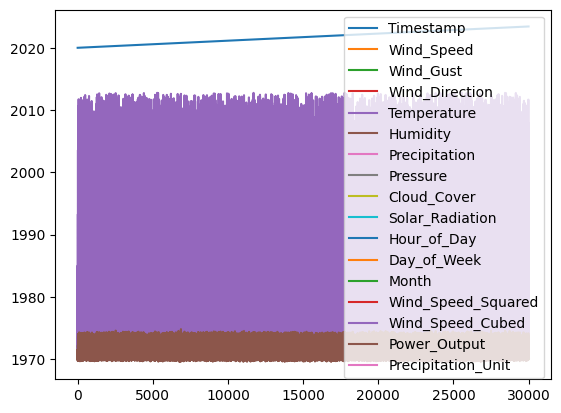

In [13]:
# First, we can plot the df
df.plot()

<Axes: >

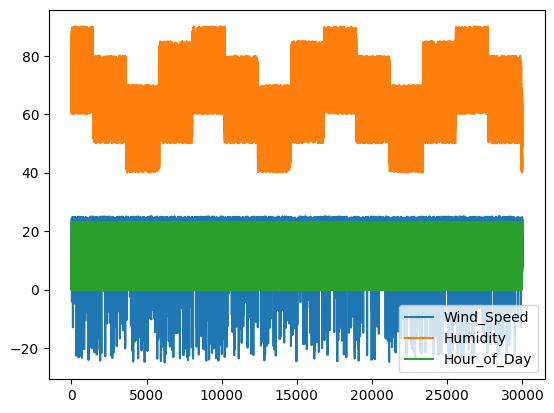

In [14]:
# Then we can see Features
X[["Wind_Speed", "Humidity", "Hour_of_Day"]].plot()

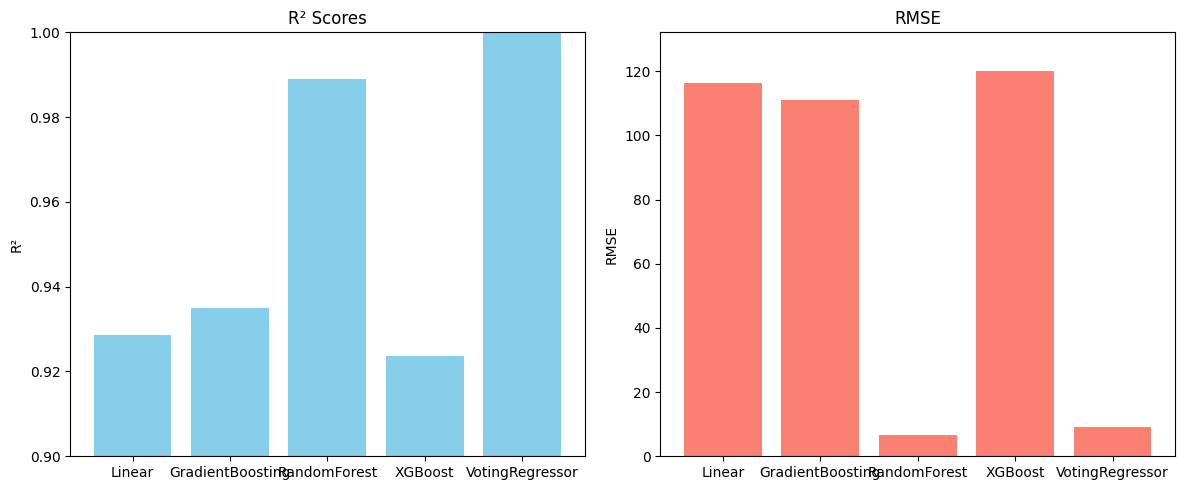

In [16]:
import matplotlib.pyplot as plt

models = ['Linear', 'GradientBoosting', 'RandomForest', 'XGBoost', "VotingRegressor"]
r2_scores = [0.9287, 0.9350, 0.9889, 0.9236, 9637]
rmse_values = [116.3992, 111.1626, 6.7711, 120.1013, 9.1167]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# R2 Scores
axs[0].bar(models, r2_scores, color='skyblue')
axs[0].set_title('R² Scores')
axs[0].set_ylabel('R²')
axs[0].set_ylim([0.9, 1.0])  # since R2 is close to 1

# RMSE
axs[1].bar(models, rmse_values, color='salmon')
axs[1].set_title('RMSE')
axs[1].set_ylabel('RMSE')
axs[1].set_ylim([0, max(rmse_values) * 1.1])

plt.tight_layout()
plt.show()

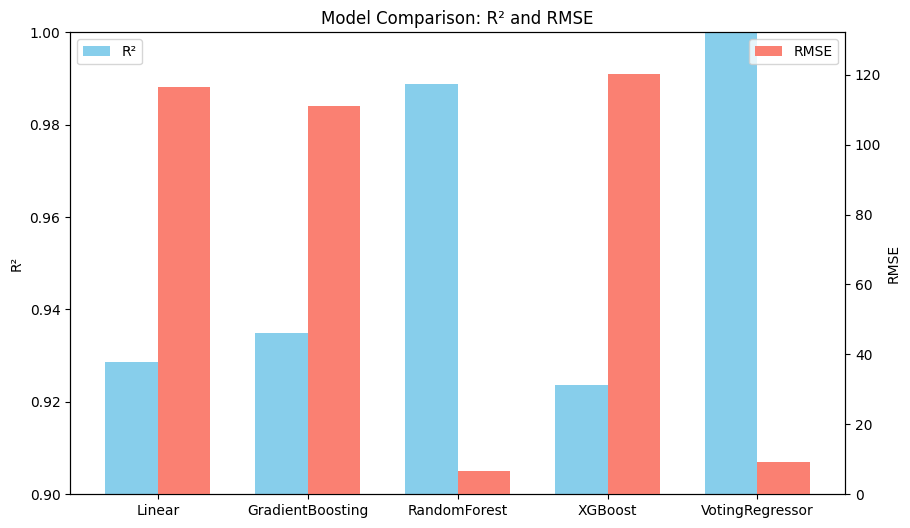

In [17]:
x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

bar1 = ax1.bar(x - width/2, r2_scores, width, label='R²', color='skyblue')
ax1.set_ylabel('R²')
ax1.set_ylim([0.9, 1.0])
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')

# Add a second y-axis
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, rmse_values, width, label='RMSE', color='salmon')
ax2.set_ylabel('RMSE')
ax2.set_ylim([0, max(rmse_values) * 1.1])
ax2.legend(loc='upper right')

plt.title('Model Comparison: R² and RMSE')
plt.show()


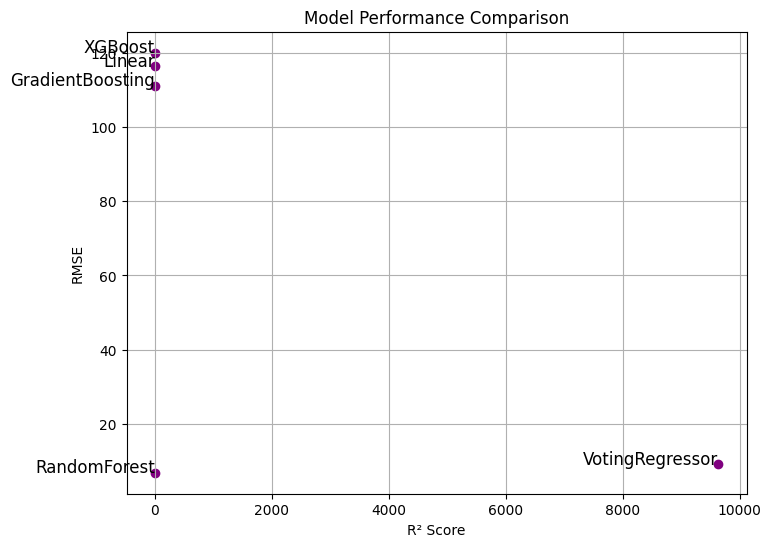

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(r2_scores, rmse_values, color='purple')

for i, model in enumerate(models):
    plt.text(r2_scores[i], rmse_values[i], model, fontsize=12, ha='right')

plt.xlabel('R² Score')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.grid(True)
plt.show()


In [29]:
import seaborn as sns

# Define y_true
y_true = y_test 

model_preds = {
    "Linear Regression": tomodachi_model.linear_model.predict(X_test).unwrap(),
    "Gradient Boosting": tomodachi_model.gradient_model.predict(X_test),
    "Random Forest": tomodachi_model.forest_model.predict(X_test),
    "XGBoost": tomodachi_model.xgboost_model.predict(X_test).unwrap(),
    "Voting Regressor": tomodachi_model.voting_regressor.predict(X_test)
}


Prediction successful!


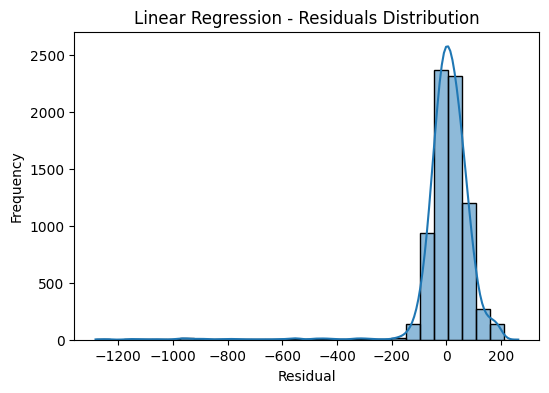

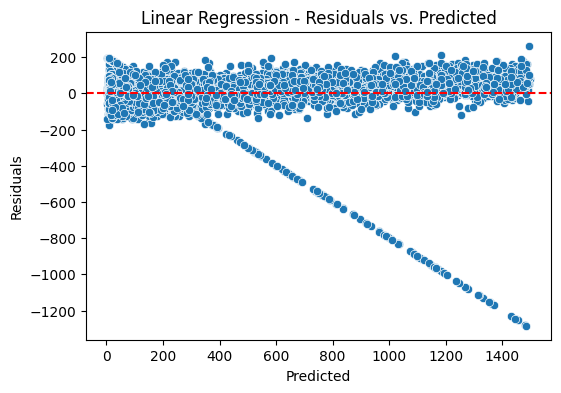

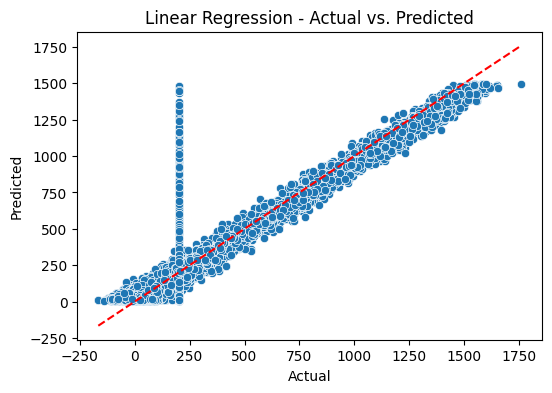

Linear Regression R²: 0.9333
Linear Regression RMSE: 10.6052


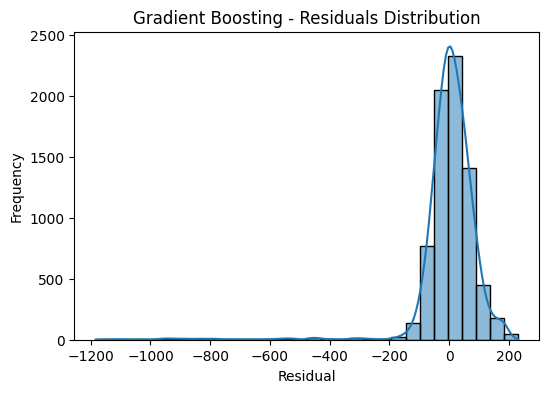

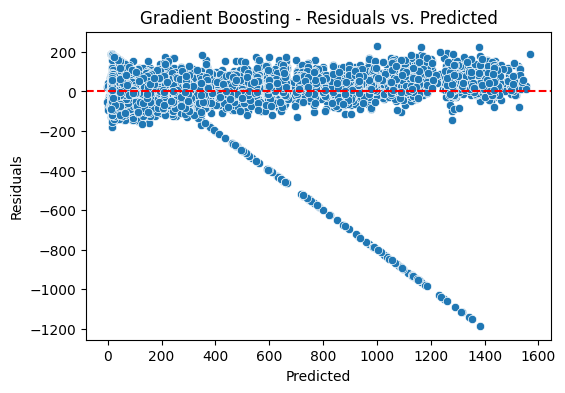

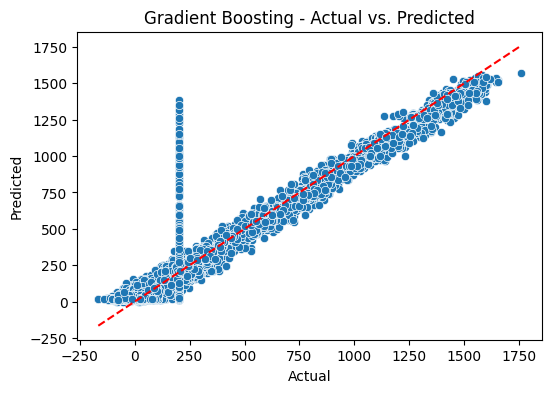

Gradient Boosting R²: 0.9402
Gradient Boosting RMSE: 10.3202


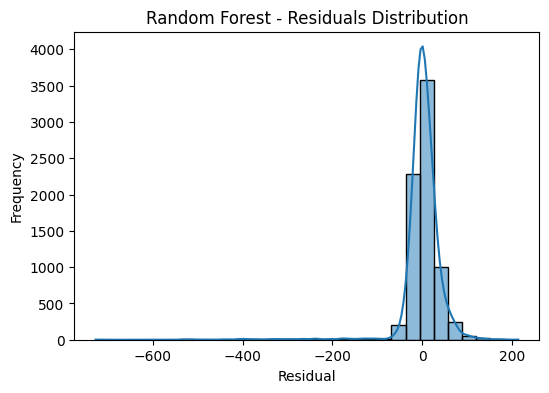

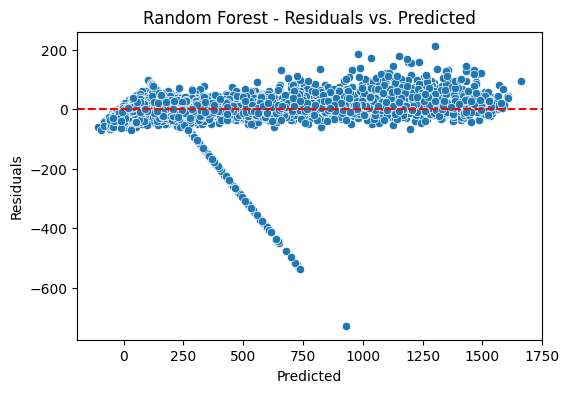

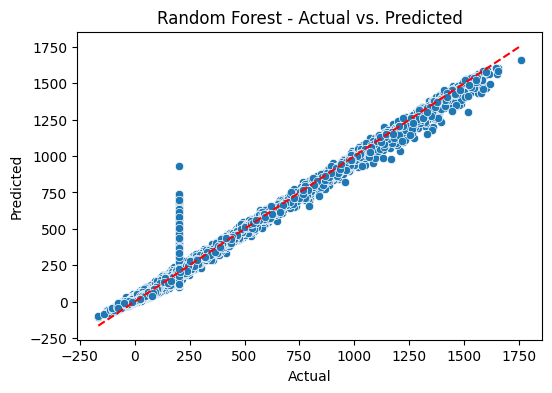

Random Forest R²: 0.9895
Random Forest RMSE: 6.6842


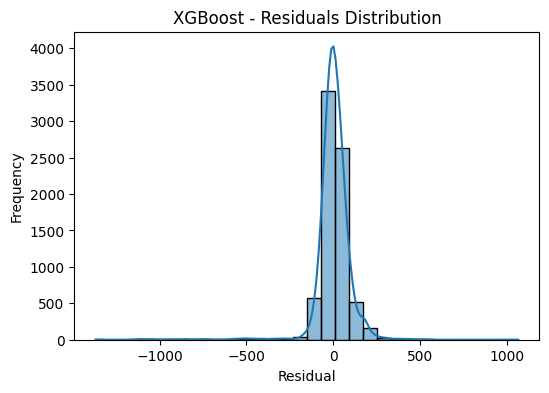

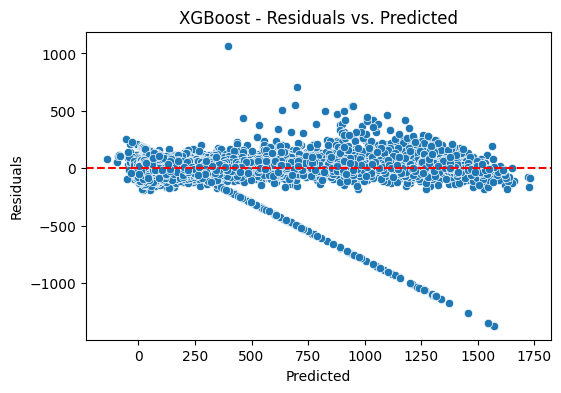

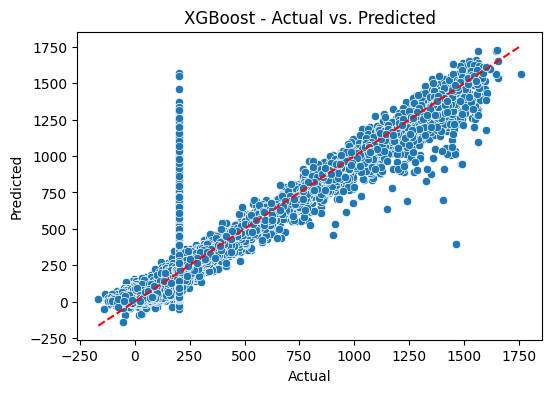

XGBoost R²: 0.9345
XGBoost RMSE: 10.5584


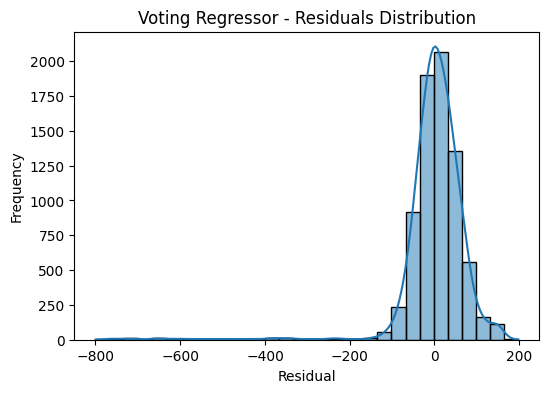

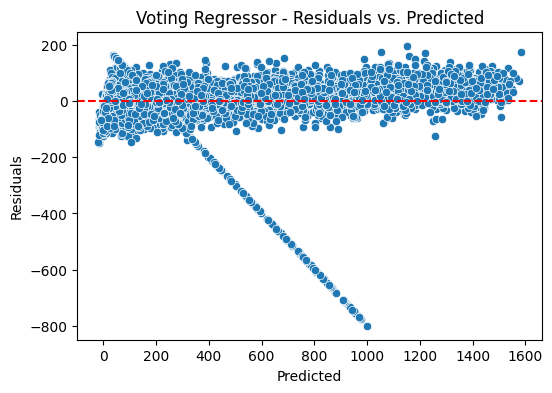

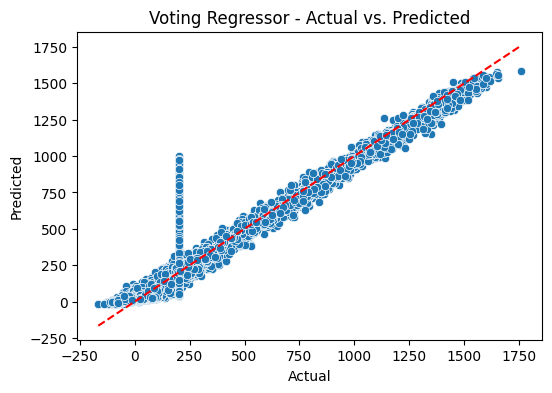

Voting Regressor R²: 0.9661
Voting Regressor RMSE: 8.9550


In [30]:
from sklearn.metrics import r2_score, root_mean_squared_error

def plot_model_evaluation(y_true, y_pred, model_name):
    residuals = y_true - y_pred

    # Residuals Distribution
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'{model_name} - Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.show()

    # Residuals vs. Predicted
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residuals vs. Predicted')
    plt.show()

    # Actual vs. Predicted
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} - Actual vs. Predicted')
    # Add reference line
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.show()

    # Print metrics
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(root_mean_squared_error(y_true, y_pred))
    print(f"{model_name} R²: {r2:.4f}")
    print(f"{model_name} RMSE: {rmse:.4f}")

# Example usage:
for model_name, y_pred in model_preds.items():
    plot_model_evaluation(y_test, y_pred, model_name)


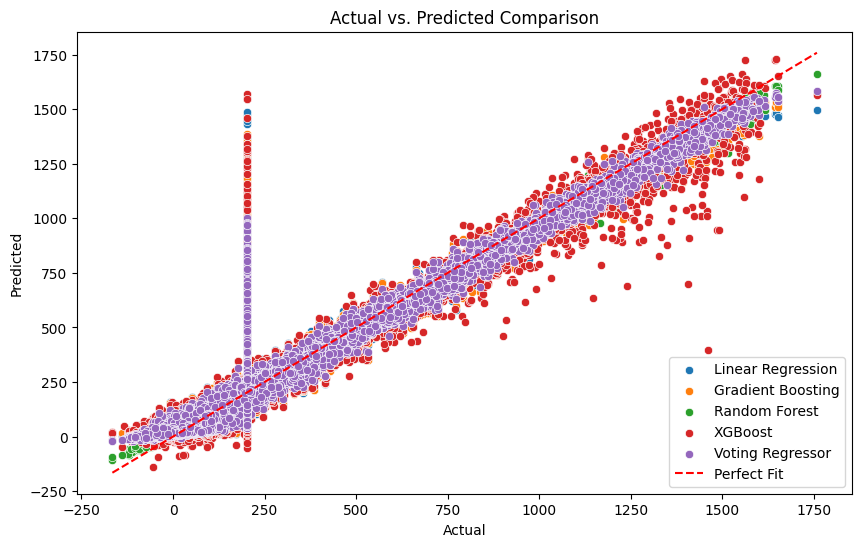

In [31]:
plt.figure(figsize=(10,6))
for model_name, y_pred in model_preds.items():
    sns.scatterplot(x=y_test, y=y_pred, label=model_name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Comparison')
plt.legend()
plt.show()
